# Abstract

# Loading The Model and Packages

Source Code: 

# Considering p > n For Linear Regression

When the number of features $p$ exceeds the number of data observations $n$, the standard closed-form solution for linear regression becomes invalid due to an issue involving matrix invertibility. The formula $\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}$ relies on the inversion of the matrix $\mathbf{X}^T\mathbf{X}$. However, when $p > n$, the matrix $\mathbf{X}$ has more columns than rows, making $\mathbf{X}^T\mathbf{X}$ a $p \times p$ matrix that is not full rank. This means it is singular, or rank-deficient, and therefore not invertible. As a result, the operation $(\mathbf{X}^T\mathbf{X})^{-1}$ is undefined, and the entire expression for $\hat{\mathbf{w}}$ in Equation 1 breaks down. This is why the closed-form solution is only valid when $n > p$, ensuring that $\mathbf{X}^T\mathbf{X}$ is invertible.


# Loading the Model and Packages

In [4]:
%load_ext autoreload
%autoreload 2
import torch
import matplotlib.pyplot as plt
import numpy as np
from OverparametrizedRegression import MyLinearRegression, OverParameterizedLinearRegressionOptimizer
plt.style.use('seaborn-v0_8-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing Model on Simple Data

In [5]:
# First we will define a class to generate random feature maps
def sig(x): 
    return 1/(1+torch.exp(-x))

def square(x): 
    return x**2

class RandomFeatures:
    """
    Random sigmoidal feature map. This feature map must be "fit" before use, like this: 

    phi = RandomFeatures(n_features = 10)
    phi.fit(X_train)
    X_train_phi = phi.transform(X_train)
    X_test_phi = phi.transform(X_test)

    model.fit(X_train_phi, y_train)
    model.score(X_test_phi, y_test)

    It is important to fit the feature map once on the training set and zero times on the test set. 
    """

    def __init__(self, n_features, activation = sig):
        self.n_features = n_features
        self.u = None
        self.b = None
        self.activation = activation

    def fit(self, X):
        self.u = torch.randn((X.size()[1], self.n_features), dtype = torch.float64)
        self.b = torch.rand((self.n_features), dtype = torch.float64) 

    def transform(self, X):
        return self.activation(X @ self.u + self.b)

To test our model we will fit nonlinear data using our random features class and feed these features to our LinearRegression model. We will then plot our predictions overtop the data.

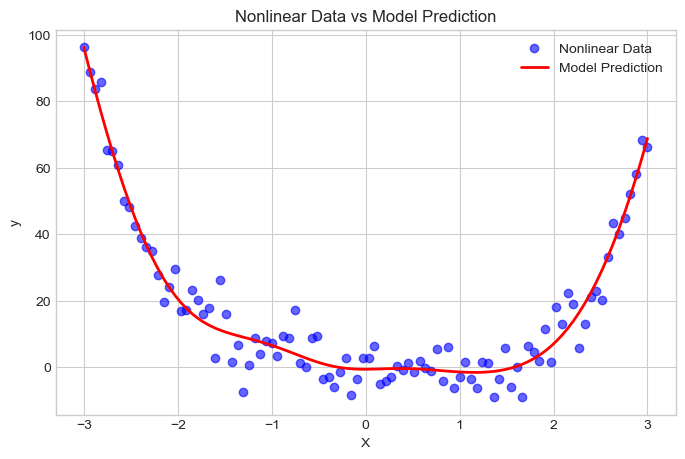

In [ ]:
# Generate Nonlinear Data
X = torch.tensor(np.linspace(-3, 3, 100).reshape(-1, 1), dtype = torch.float64)
y = X**4 - 4*X + torch.normal(0, 5, size=X.shape)

# transorm our data
phi = RandomFeatures(n_features = 10)
phi.fit(X)
phi_X = phi.transform(X)

# instantiate our model and optimizer
LR = MyLinearRegression()
opt = OverParameterizedLinearRegressionOptimizer(LR)

# fit the model to our transformed data
opt.fit(phi_X, y)

# pull predictions from the data
y_pred = LR.predict(phi_X)

# Plot predictions vs actual data
plt.figure(figsize = (8, 5))
plt.scatter(X, y, label = 'Nonlinear Data', color = 'blue', alpha = 0.6)
plt.plot(X, y_pred, label = 'Model Prediction', color = 'red', linewidth = 2)
plt.title("Nonlinear Data vs Model Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


Just based off preliminary predictions on training data is appears as if our overparametrized model is performing well. Lets continue on to explore how this model performs more in depth.

# Double Descent in Image Corruption Detection

# Discussion

In this project, we implemented Sparse Kernel Logistic Regression to classify nonlinear data, focusing on how different kernel parameters affect model performance. Changing lambda also resulted in more of the weight vectors erring from zero, which we had hoped to keep close to zero. Larger gamma tended to cause the decision bounds to fit the training data more accurately, often leading to overfitting while smaller lambda's tended to cause the model to lose the patterns in the data. Through visualization and ROC curve analysis, we observed that high gamma values, such as 1000, led the model to overfit, fitting the noise in the training data while performing poorly on new data. This process highlighted the importance of carefully tuning hyperparameters and evaluating models with metrics like AUC that capture performance across all decision thresholds. Overall, this project helped us deepen our understanding of kernel methods, regularization, and the balance between model complexity and generalization.